# **Advance Machine learning and Artificial Intelligence Project**
________________________________________________________________________
## **Plant Disease Detection System for Sustainable Agriculture.**



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Check if the path exists**

In [ ]:
import os

# Path to your dataset
dataset_path = "/content/drive/MyDrive/Colab Notebooks/PlantVillage-Dataset-master"

# Check if the path exists
if os.path.exists(dataset_path):
    print("Path exists!")
else:
    print("Path not found, please check the directory.")


Path exists!


## **Importing Required Libraries for Image Classification and Model Building**

In [ ]:
import numpy as np
import pickle
import cv2
import os
import matplotlib.pyplot as plt
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

## **Setting Up Image Parameters and Dataset Directory Paths**

In [ ]:
# Dimension of resized image
DEFAULT_IMAGE_SIZE = tuple((256, 256))

# Number of images used to train the model
N_IMAGES = 100

# Path to the dataset folder
root_dir = '/content/drive/MyDrive/Colab Notebooks/PlantVillage-Dataset-master'


train_dir = os.path.join(root_dir, 'train')
val_dir = os.path.join(root_dir, 'val')

## **Function to Convert Image to Array with Resizing**

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, DEFAULT_IMAGE_SIZE)
            return img_to_array(image)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
image_list, label_list = [], []

try:
    print("[INFO] Loading images ...")
    plant_disease_folder_list = listdir(train_dir)

    for plant_disease_folder in plant_disease_folder_list:
        print(f"[INFO] Processing {plant_disease_folder} ...")
        plant_disease_image_list = listdir(f"{train_dir}/{plant_disease_folder}/")

        for image in plant_disease_image_list[:N_IMAGES]:
            image_directory = f"{train_dir}/{plant_disease_folder}/{image}"
            if image_directory.endswith(".jpg")==True or image_directory.endswith(".JPG")==True:
                image_list.append(convert_image_to_array(image_directory))
                label_list.append(plant_disease_folder)

    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error : {e}")

# Transform the loaded training image data into numpy array
np_image_list = np.array(image_list, dtype=np.float16) / 225.0
print()

# Check the number of images loaded for training
image_len = len(image_list)
print(f"Total number of images: {image_len}")

[INFO] Loading images ...
Error : [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/PlantVillage-Dataset-master/train'

Total number of images: 0


## **Function to List Contents of the Base Directory**

In [ ]:
import os

base_directory = '/content/drive/MyDrive/Colab Notebooks/PlantVillage-Dataset-master'
print("Contents of the base directory:", os.listdir(base_directory))


Contents of the base directory: ['Corn_(maize)___Northern_Leaf_Blight', 'README.md', 'Apple___Apple_scab', 'Apple___Black_rot', 'Corn_(maize)___Common_rust_', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___healthy', 'Blueberry___healthy', 'Apple___Cedar_apple_rust', 'Cherry_(including_sour)___healthy', 'Grape___Black_rot', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Peach___Bacterial_spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Grape___Esca_(Black_Measles)', 'Pepper,_bell___healthy', 'Pepper,_bell___Bacterial_spot', 'Peach___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Tomato___Late_blight', 'Strawberry___Leaf_scorch', 'Tomato___Early_blight', 'Tomato___Bacterial_spot', 'Squash___Powdery_mildew', 'Tomato___healthy', 'Soybean___healthy', 'Strawberry___healthy', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'To

In [ ]:
from PIL import Image
import numpy as np

def convert_image_to_array(image_path):
    try:
        # Open the image file
        image = Image.open(image_path)
        # Resize the image to a consistent size, e.g., 224x224
        image = image.resize((224, 224))
        # Convert the image to an array
        image_array = np.array(image)
        # Return the array
        return image_array
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None


## **Code to Process and Store Images from a Directory**

In [ ]:
if image_path.lower().endswith((".jpg", ".jpeg", ".png")):
    image_array = convert_image_to_array(image_path)
    if image_array is not None:  # Ensure the image was processed successfully
        image_list.append(image_array)
        label_list.append(folder_name)


## **Code for Loading, Resizing, and Processing Images from the PlantVillage Dataset**

In [ ]:
import os
import numpy as np
from PIL import Image
from math import ceil
from tqdm import tqdm  # Progress bar for tracking

# Define the base directory for your dataset
root_dir = '/content/drive/MyDrive/Colab Notebooks/PlantVillage-Dataset-master'

# Initialize lists for images and labels
image_list, label_list = [], []

# Desired total number of images
TOTAL_IMAGES = 50000

# Function to convert an image to an array
def convert_image_to_array(image_path):
    try:
        # Open the image file
        image = Image.open(image_path).convert('RGB')  # Ensure RGB format
        # Resize the image to a consistent size (e.g., 224x224)
        image = image.resize((224, 224))
        # Convert the image to an array
        image_array = np.array(image)
        # Return the array
        return image_array
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

try:
    print("[INFO] Loading images ...")

    # Get the list of folders (classes) in the root directory
    folder_list = os.listdir(root_dir)
    num_classes = len(folder_list)

    # Calculate the number of images per class
    images_per_class = ceil(TOTAL_IMAGES / num_classes)

    total_images = 0  # Variable to keep track of the total number of images loaded

    for folder_name in tqdm(folder_list, desc="Processing Classes"):  # Use tqdm for progress tracking
        # Full path to the class folder
        folder_path = os.path.join(root_dir, folder_name)
        if os.path.isdir(folder_path):  # Ensure it's a directory
            print(f"[INFO] Processing {folder_name} ...")
            image_files = os.listdir(folder_path)

            # Shuffle the images to ensure randomness
            np.random.shuffle(image_files)

            for image in image_files[:images_per_class]:  # Limit to calculated number per class
                image_path = os.path.join(folder_path, image)
                # Check for valid image extensions
                if image_path.lower().endswith((".jpg", ".jpeg", ".png")):
                    image_array = convert_image_to_array(image_path)
                    if image_array is not None:  # Ensure the image was processed successfully
                        image_list.append(image_array)
                        label_list.append(folder_name)
                        total_images += 1  # Increment the counter for each image processed
                        if total_images >= TOTAL_IMAGES:  # Stop if the total number of images is reached
                            break
            if total_images >= TOTAL_IMAGES:
                break

    print("[INFO] Image loading completed")
except Exception as e:
    print(f"Error: {e}")

# Convert the loaded images to a numpy array and normalize
try:
    print("[INFO] Converting images to numpy array ...")
    np_image_list = np.array(image_list, dtype=np.float32) / 255.0  # Normalize pixel values
    print("[INFO] Conversion completed")
except MemoryError as e:
    print(f"Memory Error: {e}")
    np_image_list = None  # Handle cases where the dataset is too large for memory

# Print the total number of images processed
print(f"Total number of images: {total_images}")

# Verify the shapes of image and label arrays
if np_image_list is not None:
    print(f"Image array shape: {np_image_list.shape}")
print(f"Labels array length: {len(label_list)}")


[INFO] Loading images ...


Processing Classes:   0%|          | 0/40 [00:00<?, ?it/s]

[INFO] Processing Corn_(maize)___Northern_Leaf_Blight ...


Processing Classes:   2%|▎         | 1/40 [00:16<10:49, 16.65s/it]

[INFO] Processing Apple___Apple_scab ...


Processing Classes:   8%|▊         | 3/40 [00:25<04:39,  7.56s/it]

[INFO] Processing Apple___Black_rot ...


Processing Classes:  10%|█         | 4/40 [00:33<04:44,  7.91s/it]

[INFO] Processing Corn_(maize)___Common_rust_ ...


Processing Classes:  12%|█▎        | 5/40 [00:55<07:13, 12.37s/it]

[INFO] Processing Cherry_(including_sour)___Powdery_mildew ...


Processing Classes:  15%|█▌        | 6/40 [01:15<08:25, 14.88s/it]

[INFO] Processing Apple___healthy ...


Processing Classes:  18%|█▊        | 7/40 [01:53<12:10, 22.14s/it]

[INFO] Processing Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot ...


Processing Classes:  20%|██        | 8/40 [02:00<09:13, 17.30s/it]

[INFO] Processing Corn_(maize)___healthy ...


Processing Classes:  22%|██▎       | 9/40 [02:26<10:22, 20.07s/it]

[INFO] Processing Blueberry___healthy ...


Processing Classes:  25%|██▌       | 10/40 [02:56<11:30, 23.00s/it]

[INFO] Processing Apple___Cedar_apple_rust ...


Processing Classes:  28%|██▊       | 11/40 [02:59<08:10, 16.92s/it]

[INFO] Processing Cherry_(including_sour)___healthy ...


Processing Classes:  30%|███       | 12/40 [03:14<07:41, 16.50s/it]

[INFO] Processing Grape___Black_rot ...


Processing Classes:  32%|███▎      | 13/40 [03:36<08:13, 18.29s/it]

[INFO] Processing Grape___healthy ...


Processing Classes:  35%|███▌      | 14/40 [03:45<06:38, 15.32s/it]

[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...


Processing Classes:  38%|███▊      | 15/40 [03:50<05:07, 12.32s/it]

[INFO] Processing Peach___Bacterial_spot ...
[INFO] Processing Orange___Haunglongbing_(Citrus_greening) ...
[INFO] Processing Grape___Esca_(Black_Measles) ...


Processing Classes:  45%|████▌     | 18/40 [04:17<03:49, 10.42s/it]

[INFO] Processing Pepper,_bell___healthy ...
[INFO] Processing Pepper,_bell___Bacterial_spot ...
[INFO] Processing Peach___healthy ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Potato___healthy ...


Processing Classes: 100%|██████████| 40/40 [04:19<00:00,  6.48s/it]


[INFO] Processing Potato___Late_blight ...
[INFO] Processing Raspberry___healthy ...
[INFO] Processing Tomato___Late_blight ...
[INFO] Processing Strawberry___Leaf_scorch ...
[INFO] Processing Tomato___Early_blight ...
[INFO] Processing Tomato___Bacterial_spot ...
[INFO] Processing Squash___Powdery_mildew ...
[INFO] Processing Tomato___healthy ...
[INFO] Processing Soybean___healthy ...
[INFO] Processing Strawberry___healthy ...
[INFO] Processing Tomato___Leaf_Mold ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Tomato___Spider_mites Two-spotted_spider_mite ...
[INFO] Processing Tomato___Target_Spot ...
[INFO] Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Processing x_Removed_from_Healthy_leaves ...
[INFO] Processing Tomato___Tomato_mosaic_virus ...
[INFO] Image loading completed
[INFO] Converting images to numpy array ...
[INFO] Conversion completed
Total number of images: 13037
Image array shape: (13037, 224, 224, 3)
Labels array length: 13037


## **Code to Count and Display the Number of Images in Each Class Folder**

In [ ]:
# Print the number of images in each class folder
for folder_name in folder_list:
    folder_path = os.path.join(root_dir, folder_name)
    if os.path.isdir(folder_path):  # Ensure it's a directory
        image_files = os.listdir(folder_path)
        valid_images = [img for img in image_files if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
        print(f"{folder_name}: {len(valid_images)} images")


Apple___Apple_scab: 630 images
Apple___Black_rot: 621 images
Corn_(maize)___Common_rust_: 1196 images
Cherry_(including_sour)___Powdery_mildew: 1052 images
Apple___healthy: 1645 images
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot: 513 images
Corn_(maize)___healthy: 1162 images
Blueberry___healthy: 1502 images
Apple___Cedar_apple_rust: 275 images
Cherry_(including_sour)___healthy: 853 images
Corn_(maize)___Northern_Leaf_Blight: 985 images
Grape___Black_rot: 1180 images
Grape___healthy: 423 images
Grape___Leaf_blight_(Isariopsis_Leaf_Spot): 1076 images
Peach___Bacterial_spot: 179 images
Orange___Haunglongbing_(Citrus_greening): 4245 images
Grape___Esca_(Black_Measles): 1383 images
Pepper,_bell___healthy: 107 images
Pepper,_bell___Bacterial_spot: 73 images
Peach___healthy: 128 images
Potato___Early_blight: 121 images
Potato___healthy: 152 images
Potato___Late_blight: 106 images
Raspberry___healthy: 71 images
Tomato___Late_blight: 201 images
Strawberry___Leaf_scorch: 146 images
Tomat

## **Code for Counting Images and Uploading to Empty Folders in Google Drive**

In [ ]:
from google.colab import drive, files
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

# Define the root directory of your dataset
root_dir = '/content/drive/MyDrive/Colab Notebooks/PlantVillage-Dataset-master'

# Get the list of all subfolders (classes)
folder_list = os.listdir(root_dir)

# Initialize a dictionary to store folder names and image counts
folder_image_count = {}

# Count the number of images in each folder
for folder_name in folder_list:
    folder_path = os.path.join(root_dir, folder_name)
    if os.path.isdir(folder_path):  # Check if it's a directory
        image_files = [f for f in os.listdir(folder_path) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
        folder_image_count[folder_name] = len(image_files)

# List folders that have 0 images
empty_folders = [folder for folder, count in folder_image_count.items() if count == 0]

# If there are folders with 0 images, show them with numbering
if empty_folders:
    print("Folders with 0 images:")
    for idx, folder in enumerate(empty_folders, start=1):
        print(f"{idx}. {folder}")

    # Prompt the user to choose a folder by number
    try:
        folder_choice_idx = int(input(f"Select a folder number from the above list to upload images to: ")) - 1
        folder_choice = empty_folders[folder_choice_idx]

        # Define the folder path for the selected folder
        folder_path = os.path.join(root_dir, folder_choice)

        # Create the folder if it doesn't exist
        os.makedirs(folder_path, exist_ok=True)

        # Upload the images
        print(f"Upload the images to add to {folder_choice}:")
        uploaded = files.upload()

        # Copy the uploaded files to the selected folder
        for filename in uploaded.keys():
            shutil.copy(filename, os.path.join(folder_path, filename))

        print(f"Uploaded images to {folder_path}")
    except (ValueError, IndexError):
        print("Invalid folder number. Please try again.")
else:
    print("All folders have images.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
All folders have images.


## **Code to List Subfolders and Check for Images in Each Folder in the Dataset**

In [ ]:
import os

# Define dataset path
dataset_path = '/content/drive/MyDrive/Colab Notebooks/PlantVillage-Dataset-master'

# List all subfolders
if not os.path.exists(dataset_path):
    print(f"Dataset path {dataset_path} does not exist!")
else:
    subfolders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
    print(f"Subfolders found in the dataset: {subfolders}")

    # Check for images in each subfolder
    for subfolder in subfolders:
        subfolder_path = os.path.join(dataset_path, subfolder)
        images = [f for f in os.listdir(subfolder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        print(f"Subfolder: {subfolder} - Number of images: {len(images)}")
        if len(images) > 0:
            print(f"Sample images: {images[:3]}")  # Print up to 3 sample images

# Debug the label_list
label_list = []  # Replace this with how you are generating label_list
if len(label_list) == 0:
    print("The label_list is empty! Check how it's being populated.")
else:
    print(f"Label list contains {len(label_list)} labels.")


Subfolders found in the dataset: ['Apple___Apple_scab', 'Apple___Black_rot', 'Corn_(maize)___Common_rust_', 'Cherry_(including_sour)___Powdery_mildew', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___healthy', 'Blueberry___healthy', 'Apple___Cedar_apple_rust', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Peach___Bacterial_spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Grape___Esca_(Black_Measles)', 'Pepper,_bell___healthy', 'Pepper,_bell___Bacterial_spot', 'Peach___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Tomato___Late_blight', 'Strawberry___Leaf_scorch', 'Tomato___Early_blight', 'Tomato___Bacterial_spot', 'Squash___Powdery_mildew', 'Tomato___healthy', 'Soybean___healthy', 'Strawberry___healthy', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spide

In [ ]:
# Generate label list from subfolder names
label_list = [folder for folder in subfolders for _ in os.listdir(os.path.join(dataset_path, folder))]


## **Code to Binarize Labels and Save the Label Transformer**

In [ ]:
from sklearn.preprocessing import LabelBinarizer
import pickle

# Ensure label_list is populated
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)

# Save the label binarizer
with open('plant_disease_label_transform.pkl', 'wb') as file:
    pickle.dump(label_binarizer, file)

print(f"Number of classes: {len(label_binarizer.classes_)}")


Number of classes: 39


## **Code for Setting Up Data Augmentation with ImageDataGenerator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation process
augment = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

print("Data augmentation setup completed.")


Data augmentation setup completed.


In [ ]:
augment = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True,
                             fill_mode="nearest")

## **Code for Loading and Normalizing Images into a NumPy Array**

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Assuming `image_list` is a list of paths to your images
np_image_list = []
for image_path in image_list:  # Replace `image_list` with your list of image paths
    try:
        img = load_img(image_path, target_size=(224, 224))  # Resize images to (224, 224)
        img_array = img_to_array(img) / 255.0  # Normalize pixel values
        np_image_list.append(img_array)
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")

np_image_list = np.array(np_image_list)  # Convert list to NumPy array


In [ ]:
image_labels = np.array(label_list)  # Replace `label_list` with your actual labels


In [ ]:
print(f"Number of image paths: {len(image_list)}")



Number of image paths: 0


In [ ]:
print(f"Number of images in np_image_list: {len(np_image_list)}")


Number of images in np_image_list: 0


In [ ]:
print(f"Number of labels: {len(image_labels)}")


Number of labels: 21354


## **Code for Collecting Image Paths and Labels from Dataset Directory**

In [ ]:
import os

dataset_dir = '/content/drive/MyDrive/Colab Notebooks/PlantVillage-Dataset-master'
image_list = []
label_list = []

for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)
    if os.path.isdir(folder_path):
        for img_file in os.listdir(folder_path):
            if img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                image_list.append(os.path.join(folder_path, img_file))
                label_list.append(folder_name)  # Use folder name as the label


In [ ]:
if not image_list or not label_list:
    raise ValueError("Image list or label list is empty. Please provide valid data.")


In [ ]:
for img_batch, label_batch in dataset.take(1):  # Take one batch
    print(f"Batch shape: {img_batch.shape}, Labels: {label_batch.numpy()}")


Batch shape: (224, 224, 3), Labels: b'Apple___Apple_scab'


## **Code for Label Encoding and Conversion to TensorFlow-Compatible Format**

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Assuming labels are in string format
label_encoder = LabelEncoder()

# Fit and transform the labels
labels = label_encoder.fit_transform(labels)

# Now cast the labels to int32
labels = tf.cast(labels, tf.int32)


In [ ]:
dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)  # This already uses autotune


Error processing image Tensor("args_0:0", shape=(None, 224, 224, 3), dtype=float32): Input 'filename' of 'ReadFile' Op has type float32 that does not match expected type of string.


## **Code for Splitting Dataset into Training and Validation Sets**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert TensorFlow tensors to NumPy arrays
image_paths_np = np.array(image_paths)
labels_np = np.array(labels)

# Train-test split (80-20 ratio)
train_image_paths, val_image_paths, train_labels, val_labels = train_test_split(image_paths_np, labels_np, test_size=0.2, random_state=42)



In [ ]:
print(len(np_image_list))
print(len(image_labels))


6386
21354


In [ ]:
# Assuming np_image_list is longer than image_labels, you can trim it to the same length
np_image_list = np_image_list[:len(image_labels)]


In [ ]:
print("Length of np_image_list:", len(np_image_list))
print("Length of image_labels:", len(image_labels))


Length of np_image_list: 6386
Length of image_labels: 21354


In [ ]:
np_image_list = np_image_list[:len(image_labels)]


In [ ]:
print(np_image_list[:5])  # First 5 image paths
print(image_labels[:5])  # First 5 labels


[array([[[0.91764706, 0.88235295, 0.9490196 ],
        [0.7490196 , 0.7137255 , 0.78039217],
        [0.7176471 , 0.68235296, 0.7490196 ],
        ...,
        [0.13725491, 0.13333334, 0.20392157],
        [0.13725491, 0.13333334, 0.20392157],
        [0.13725491, 0.13333334, 0.20392157]],

       [[0.8117647 , 0.7764706 , 0.84313726],
        [0.76862746, 0.73333335, 0.8       ],
        [0.9411765 , 0.90588236, 0.972549  ],
        ...,
        [0.13333334, 0.12941177, 0.2       ],
        [0.13333334, 0.12941177, 0.2       ],
        [0.13333334, 0.12941177, 0.2       ]],

       [[0.83137256, 0.79607844, 0.8627451 ],
        [0.8509804 , 0.8156863 , 0.88235295],
        [0.7882353 , 0.7529412 , 0.81960785],
        ...,
        [0.14509805, 0.14117648, 0.21176471],
        [0.14509805, 0.14117648, 0.21176471],
        [0.14117648, 0.13725491, 0.20784314]],

       ...,

       [[0.11764706, 0.12941177, 0.20392157],
        [0.11764706, 0.12941177, 0.20392157],
        [0.11764706, 

In [ ]:
from sklearn.model_selection import train_test_split

print("[INFO] Splitting data into train and test...")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state=42)


In [ ]:
np_image_list = [...]  # Define or load your images



In [ ]:
import numpy as np


## **Code for Loading and Labeling Images from Dataset Directory**

In [ ]:
import os
from PIL import Image
import numpy as np

# Path to your dataset
image_dir = "/content/drive/MyDrive/Colab Notebooks/PlantVillage-Dataset-master"

# Initialize lists for images and labels
np_image_list = []
image_labels = []

# Loop through each class folder
for label in os.listdir(image_dir):
    label_path = os.path.join(image_dir, label)

    # Check if it's a directory (class folder)
    if os.path.isdir(label_path):
        for filename in os.listdir(label_path):
            if filename.endswith(('.jpg', '.png', '.jpeg')):  # Adjust for your image types
                file_path = os.path.join(label_path, filename)

                # Load image, convert to array, and append to the list
                try:
                    img = Image.open(file_path).convert("RGB")  # Ensure all images are RGB
                    np_image_list.append(np.array(img))
                    image_labels.append(label)  # Use folder name as the label
                except Exception as e:
                    print(f"Error loading image {file_path}: {e}")

# Convert lists to NumPy arrays
np_image_list = np.array(np_image_list)
image_labels = np.array(image_labels)

# Verify lengths
print(f"Loaded {len(np_image_list)} images and {len(image_labels)} labels.")


Loaded 1339 images and 1339 labels.


In [ ]:
print("[INFO] Splitting data to train and test...")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42)

[INFO] Splitting data to train and test...


In [ ]:
from sklearn.model_selection import train_test_split


## **Code for Loading, Labeling Images, and Splitting the Dataset into Training and Testing Sets**

In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

# Path to your dataset
image_dir = "/content/drive/MyDrive/Colab Notebooks/PlantVillage-Dataset-master"

# Initialize lists for images and labels
np_image_list = []
image_labels = []

# Loop through each class folder
for label in os.listdir(image_dir):
    label_path = os.path.join(image_dir, label)

    # Check if it's a directory (class folder)
    if os.path.isdir(label_path):
        for filename in os.listdir(label_path):
            if filename.endswith(('.jpg', '.png', '.jpeg')):  # Adjust for your image types
                file_path = os.path.join(label_path, filename)

                # Load image, convert to array, and append to the list
                try:
                    img = Image.open(file_path).convert("RGB")  # Ensure all images are RGB
                    np_image_list.append(np.array(img))
                    image_labels.append(label)  # Use folder name as the label
                except Exception as e:
                    print(f"Error loading image {file_path}: {e}")

# Convert lists to NumPy arrays
np_image_list = np.array(np_image_list)
image_labels = np.array(image_labels)

# Verify lengths
print(f"Loaded {len(np_image_list)} images and {len(image_labels)} labels.")

# Splitting the data into training and testing sets
print("[INFO] Splitting data to train and test...")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state=42)

print(f"Training data: {len(x_train)} samples")
print(f"Testing data: {len(x_test)} samples")


Loaded 1339 images and 1339 labels.
[INFO] Splitting data to train and test...
Training data: 1071 samples
Testing data: 268 samples


In [ ]:
# Using parentheses for line continuation
x_train, x_test, y_train, y_test = train_test_split(
    np_image_list, image_labels, test_size=0.2, random_state=42
)


### **Hyperparameters for Model Training**

In [ ]:
EPOCHS = 25
STEPS = 100
LR = 1e-3
BATCH_SIZE = 32
WIDTH = 256
HEIGHT = 256
DEPTH = 3

In [ ]:
from tensorflow.keras.models import Sequential


## **Code for Building and Compiling a Convolutional Neural Network (CNN) Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import backend as K

# Define constants
HEIGHT = 128  # Replace with your image height
WIDTH = 128   # Replace with your image width
DEPTH = 3     # Number of channels (e.g., 3 for RGB)

# Create the model
model = Sequential()

# Define the input shape
inputShape = (HEIGHT, WIDTH, DEPTH)
chanDim = -1  # Default channel dimension for TensorFlow

# Adjust for 'channels_first' data format (if necessary)
if K.image_data_format() == "channels_first":
    inputShape = (DEPTH, HEIGHT, WIDTH)
    chanDim = 1

# Add layers to the model
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=inputShape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))  # Adjust '10' to the number of classes in your dataset

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,610 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam


### **Code for Building and Compiling a CNN Model for Binary Classification with Adam Optimizer**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define constants
HEIGHT = 128  # Replace with your image height
WIDTH = 128   # Replace with your image width
DEPTH = 3     # Number of channels (e.g., 3 for RGB)
LR = 0.001    # Learning rate
EPOCHS = 25   # Number of epochs

# Create the model
model = Sequential()
inputShape = (HEIGHT, WIDTH, DEPTH)

# Add layers
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=inputShape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))  # For binary classification

# Initialize the optimizer
opt = Adam(learning_rate=LR, decay=LR / EPOCHS)

# Compile the model
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# Display model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam


### **Code for Compiling the Model with Adam Optimizer and Binary Crossentropy Loss Function**

In [ ]:
from tensorflow.keras.optimizers import Adam

# Define constants
LR = 0.001  # Learning rate
EPOCHS = 25  # Number of epochs

# Initialize the optimizer
opt = Adam(learning_rate=LR)  # Use learning_rate instead of lr

# Compile the model
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


### **Code for Encoding Labels Using LabelEncoder for Training and Testing Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert labels to integers
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode labels
num_classes = len(set(y_train))  # Number of unique classes
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [ ]:
# Convert image data to float32 and normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [ ]:
print(f"x_train shape: {x_train.shape}, dtype: {x_train.dtype}")
print(f"x_test shape: {x_test.shape}, dtype: {x_test.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")

x_train shape: (1071, 256, 256, 3), dtype: float32
x_test shape: (268, 256, 256, 3), dtype: float32
y_train shape: (1071, 5), dtype: float64
y_test shape: (268, 5), dtype: float64


### **Code for Data Preprocessing and Model Training with One-Hot Encoding**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# Normalize image data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Encode labels as integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# One-hot encode labels (if needed)
num_classes = len(set(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Print shapes and dtypes
print(f"x_train shape: {x_train.shape}, dtype: {x_train.dtype}")
print(f"x_test shape: {x_test.shape}, dtype: {x_test.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")

# Fit the model
model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=EPOCHS,
    batch_size=32
)


In [ ]:
# Directly use y_train and y_test if they are already one-hot encoded
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")


y_train shape: (1071, 5), dtype: float64
y_test shape: (268, 5), dtype: float64


In [ ]:
# Flatten labels into a 1D array
y_train = y_train.flatten()
y_test = y_test.flatten()

# Encode labels if they are strings
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode labels again (if required)
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [ ]:
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"y_train sample: {y_train[:5]}")


y_train shape: (5355, 2), dtype: float64
y_train sample: [[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Flatten labels if they are mistakenly 2D
if len(y_train.shape) > 1 and y_train.shape[1] == 1:
    y_train = y_train.flatten()
    y_test = y_test.flatten()

# Convert one-hot encoded labels back to integers (if necessary)
if len(y_train.shape) > 1:
    y_train = np.argmax(y_train, axis=1)
    y_test = np.argmax(y_test, axis=1)

# Encode string labels to integers
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# One-hot encode if required
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Print shapes
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


y_train shape: (5355, 2)
y_test shape: (1340, 2)


In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")


x_train shape: (1071, 256, 256, 3)
y_train shape: (5355, 2)


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming np_image_list and image_labels have been correctly processed
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")


x_train shape: (1071, 256, 256, 3)
y_train shape: (1071,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string labels to integer labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Apply one-hot encoding to integer labels
y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

# Print the shape of the transformed labels
print(f"y_train shape after transformation: {y_train.shape}")
print(f"y_test shape after transformation: {y_test.shape}")



y_train shape after transformation: (1071, 5)
y_test shape after transformation: (268, 5)


In [ ]:
print(f"Sample y_train values: {y_train[:5]}")

Sample y_train values: [[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


## **Training the Model and Plotting Metrics**


In [ ]:
# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=[lr_scheduler]  # If you are using a learning rate scheduler
)

# Now, you can access the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Optionally, plot the metrics
import matplotlib.pyplot as plt

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



## **Model Architecture Summary**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Convolutional layers (for example)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output before passing it to Dense layers
model.add(Flatten())

# Fully connected (Dense) layers
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))  # Assuming 5 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary to check the architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      31,490,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,510,213 (120.20 MB)

 Trainable params: 31,510,213 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

## **Training and Evaluation Metrics Visualization**


Epoch 1/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 149s 4s/step - accuracy: 0.7290 - loss: 1654.0144 - val_accuracy: 0.8769 - val_loss: 1.1560 - learning_rate: 0.0010
Epoch 2/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.9415 - loss: 0.9580 - val_accuracy: 0.8433 - val_loss: 2.5015 - learning_rate: 0.0010
Epoch 3/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.9243 - loss: 0.8935 - val_accuracy: 0.8582 - val_loss: 0.8795 - learning_rate: 0.0010
Epoch 4/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.9287 - loss: 0.6335 - val_accuracy: 0.8507 - val_loss: 1.2567 - learning_rate: 0.0010
Epoch 5/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.9519 - loss: 0.4644 - val_accuracy: 0.8507 - val_loss: 0.7463 - learning_rate: 0.0010
Epoch 6/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.9844 - loss: 0.2418 - val_accuracy: 0.8769 - val_loss: 0.7715 - learning_rate: 0.0010
Epoch 7/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 203s 4s/step - accuracy: 0.9729 - loss: 0.2052 - val_

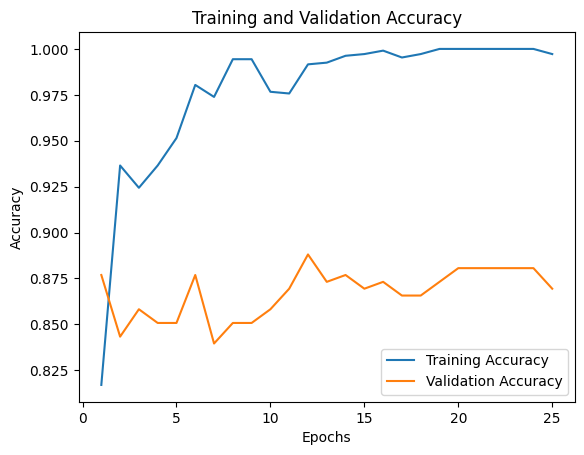

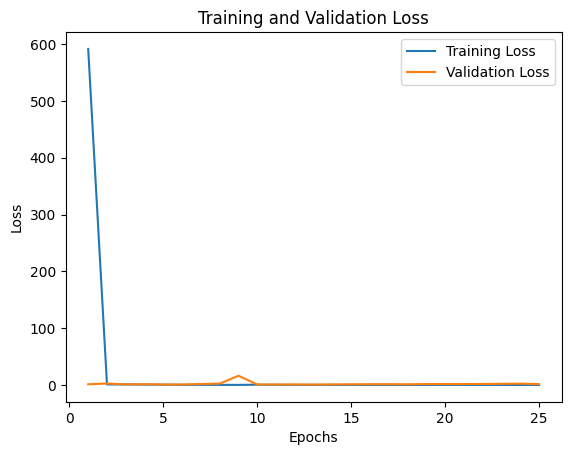

In [ ]:
# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=[lr_scheduler]  # If you are using a learning rate scheduler
)

# Now, you can access the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Optionally, plot the metrics
import matplotlib.pyplot as plt

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


### **Model Evaluation and Accuracy Calculation**

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.8878 - loss: 1.0604
Test Accuracy: 86.94030046463013


## **Model Creation Using ResNet50 with Transfer Learning**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Example of model creation using ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(40, activation='softmax')  # 40 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Saving the Model in Keras and Pickle Formats**

In [ ]:
# Save the model using the Keras save method
model.save('MAIN_plant_disease_AICTE_model.h5')

# If you prefer to use pickle for the model (not recommended for Keras models):
import pickle
pickle.dump(model, open('MAIN_plant_disease_AICTE_model.pkl', 'wb'))


In [ ]:
# Loading the model saved in .h5 format
from tensorflow.keras.models import load_model
loaded_model = load_model('MAIN_plant_disease_AICTE_model.h5')

# Loading the model saved with pickle
import pickle
loaded_model = pickle.load(open('MAIN_plant_disease_AICTE_model.pkl', 'rb'))


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 216 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


## **Predicting Plant Disease Using the Trained Model**

In [ ]:
def predict_disease(image_path):
    image_array = convert_image_to_array(image_path)
    np_image = np.array(image_array, dtype=np.float16) / 225.0
    np_image = np.expand_dims(np_image,0)
    plt.imshow(plt.imread(image_path))
    result = model.predict_classes(np_image)
    print((image_labels.classes_[result][0]))

## **Test the model by randomly selecting images from the dataset and predicting the class or disease of the plant in the image.**


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


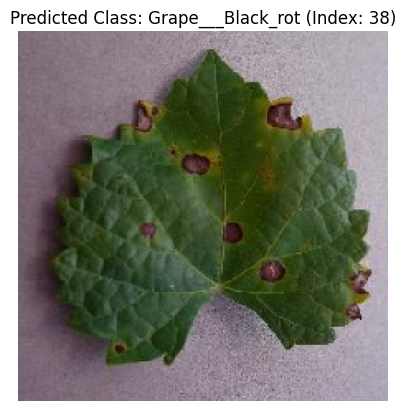

Predicted class: Grape___Black_rot (Index: 38)


In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os

# Load the model
model = load_model('MAIN_plant_disease_AICTE_model.h5')  # Adjust the model path if necessary

# Set the root directory where your dataset is stored
root_dir = '/content/drive/MyDrive/Colab Notebooks/PlantVillage-Dataset-master'  # Change to your dataset directory

# Get the list of all the folders (classes) in the root directory
class_folders = [folder for folder in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, folder))]

# Randomly choose a class (disease folder)
random_class_folder = random.choice(class_folders)
class_folder_path = os.path.join(root_dir, random_class_folder)

# Get a list of image files in the chosen class
image_files = [f for f in os.listdir(class_folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Randomly choose an image from the selected class
random_image_file = random.choice(image_files)
image_path = os.path.join(class_folder_path, random_image_file)

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))  # Resize image to match model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Preprocess the image for ResNet

# Make a prediction
prediction = model.predict(img_array)

# Get the predicted class (index)
predicted_class_index = np.argmax(prediction, axis=1)[0]

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted Class: {random_class_folder} (Index: {predicted_class_index})")
plt.axis('off')
plt.show()

# Optionally, print the predicted class
print(f"Predicted class: {random_class_folder} (Index: {predicted_class_index})")


## **Allow the user to select an image from the root directory by interacting with the dataset folder**

Available classes (diseases) in the dataset:
1. Apple___Apple_scab
2. Apple___Black_rot
3. Corn_(maize)___Common_rust_
4. Cherry_(including_sour)___Powdery_mildew
5. Apple___healthy
6. Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
7. Corn_(maize)___healthy
8. Blueberry___healthy
9. Apple___Cedar_apple_rust
10. Cherry_(including_sour)___healthy
11. Corn_(maize)___Northern_Leaf_Blight
12. Grape___Black_rot
13. Grape___healthy
14. Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
15. Peach___Bacterial_spot
16. Orange___Haunglongbing_(Citrus_greening)
17. Grape___Esca_(Black_Measles)
18. Pepper,_bell___healthy
19. Pepper,_bell___Bacterial_spot
20. Peach___healthy
21. Potato___Early_blight
22. Potato___healthy
23. Potato___Late_blight
24. Raspberry___healthy
25. Tomato___Late_blight
26. Strawberry___Leaf_scorch
27. Tomato___Early_blight
28. Tomato___Bacterial_spot
29. Squash___Powdery_mildew
30. Tomato___healthy
31. Soybean___healthy
32. Strawberry___healthy
33. Tomato___Leaf_Mold
34. Tomato_

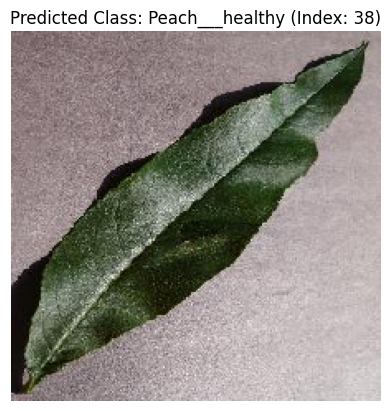

Predicted class: Peach___healthy (Index: 38)


In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import os

# Load the model
model = load_model('MAIN_plant_disease_AICTE_model.h5')  # Adjust the model path if necessary

# Set the root directory where your dataset is stored
root_dir = '/content/drive/MyDrive/Colab Notebooks/PlantVillage-Dataset-master'  # Change to your dataset directory

# Get the list of all the folders (classes) in the root directory
class_folders = [folder for folder in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, folder))]

# Display available class folders
print("Available classes (diseases) in the dataset:")
for i, folder in enumerate(class_folders, 1):
    print(f"{i}. {folder}")

# Ask the user to select a folder by its number
selected_class_index = int(input(f"Please select a class (1-{len(class_folders)}): ")) - 1
selected_class_folder = class_folders[selected_class_index]
class_folder_path = os.path.join(root_dir, selected_class_folder)

# Get the list of image files in the selected class folder
image_files = [f for f in os.listdir(class_folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Display available images in the selected folder
print(f"\nAvailable images in '{selected_class_folder}':")
for i, img in enumerate(image_files, 1):
    print(f"{i}. {img}")

# Ask the user to select an image by its number
selected_image_index = int(input(f"Please select an image (1-{len(image_files)}): ")) - 1
selected_image_file = image_files[selected_image_index]
image_path = os.path.join(class_folder_path, selected_image_file)

# Load and preprocess the selected image
img = image.load_img(image_path, target_size=(224, 224))  # Resize image to match model input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = preprocess_input(img_array)  # Preprocess the image for ResNet

# Make a prediction
prediction = model.predict(img_array)

# Get the predicted class (index)
predicted_class_index = np.argmax(prediction, axis=1)[0]

# Display the image and prediction
plt.imshow(img)
plt.title(f"Predicted Class: {selected_class_folder} (Index: {predicted_class_index})")
plt.axis('off')
plt.show()

# Optionally, print the predicted class
print(f"Predicted class: {selected_class_folder} (Index: {predicted_class_index})")


In [3]:
import shutil

# Path to the .pkl file
pkl_file_path = "/content/drive/MyDrive/Colab Notebooks/MAIN_Plant_Disease_AICTE.ipynb"

# Path to save the compressed file
zip_file_path = "/content/MAIN_Plant_Disease_AICTE.zip"

# Compress the .pkl file into a zip file
shutil.make_archive(base_name=zip_file_path.replace(".zip", ""), format="zip", root_dir=pkl_file_path.rsplit("/", 1)[0], base_dir=pkl_file_path.rsplit("/", 1)[1])

print("File compressed successfully!")


File compressed successfully!


In [4]:
from google.colab import files

# Download the ZIP file
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>